<a href="https://colab.research.google.com/github/Prattoypaul/deeplearning/blob/machinel/Customercurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep learning/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df=df.drop('customerID',axis=1)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [15]:

df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [18]:
df=df[df.TotalCharges!=' ']
df.shape

(7032, 20)

In [21]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [22]:
df_churn_no=df[df.Churn=='No'].tenure
df_churn_yes=df[df.Churn=='Yes'].tenure

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


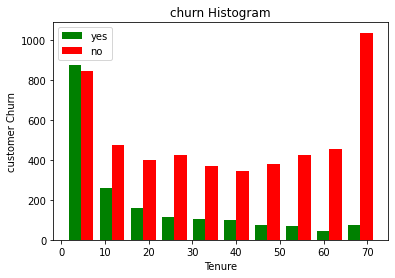

In [26]:
plt.title('churn Histogram')
plt.xlabel('Tenure')
plt.ylabel('customer Churn')
plt.hist([df_churn_yes,df_churn_no],color=['green','red'],label=['yes','no'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


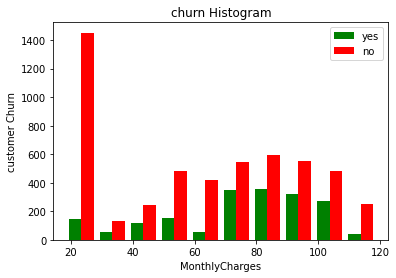

In [27]:
mc_churn_no=df[df.Churn=='No'].MonthlyCharges
mc_churn_yes=df[df.Churn=='Yes'].MonthlyCharges
plt.title('churn Histogram')
plt.xlabel('MonthlyCharges')
plt.ylabel('customer Churn')
plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['yes','no'])
plt.legend()

In [36]:
def print_uniq_column_value(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column} : {df[column].unique()}')

In [37]:
print_uniq_column_value(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [39]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

In [40]:
print_uniq_column_value(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [41]:
yes_no_col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [43]:
for col in yes_no_col:
  df[col].replace({'Yes': 1 ,'No': 0 },inplace=True )

In [44]:
for col in df:
  print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [46]:
df['gender'].replace({'Female': 0 ,'Male': 1 },inplace=True )

In [47]:
df1=pd.get_dummies(data=df ,columns=['InternetService','Contract','PaymentMethod'])

In [48]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [50]:
col_scl=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler()

In [51]:
df1[col_scl]=scl.fit_transform(df1[col_scl])

In [52]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2890,0,1,1,1,0.647887,1,0,0,0,0,0,0,0,0,0.520398,0.379697,1,0,1,0,1,0,0,1,0,0,0
3054,0,0,0,1,0.929577,1,1,0,1,0,1,1,1,1,0.879104,0.833822,0,0,1,0,0,1,0,1,0,0,0
1086,0,1,0,0,0.140845,1,0,0,0,0,0,1,1,0,0.710945,0.118728,1,0,1,0,1,0,0,1,0,0,0
6307,0,0,0,0,0.436620,1,0,0,0,0,0,0,0,0,0.016418,0.067246,0,0,0,1,1,0,0,1,0,0,0
835,1,1,1,1,0.830986,1,1,1,1,0,0,0,1,1,0.746269,0.664176,0,0,1,0,1,0,0,0,0,1,0


In [53]:
x=df1.drop('Churn',axis=1)

In [54]:
y=df1['Churn']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [58]:
xtrain.shape

(4922, 26)

In [57]:
import tensorflow as tf
from tensorflow import keras

In [59]:
model=keras.Sequential([
                        keras.layers.Dense(1000,input_shape=(26,),activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid'),

])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [61]:
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8192
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8234
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.8232
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8247
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8239
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8279
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8312
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8302
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8356
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3560 - accura

In [63]:
model.evaluate(xtest,ytest)

66/66 [==============================] - 0s 1ms/step - loss: 0.7707 - accuracy: 0.7389


[0.7707263231277466, 0.7388625741004944]

In [64]:
yp=model.predict(xtest)

In [66]:
y_pred=[]
for elm in yp:
  if elm<0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)


In [69]:
y_pred[3:6]

[1, 1, 1]

In [70]:
ytest[3:6]

1665    0
927     1
4648    0
Name: Churn, dtype: int64

In [71]:
from sklearn.metrics import confusion_matrix,classification_report

In [72]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1555
           1       0.50      0.53      0.52       555

    accuracy                           0.74      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.74      0.74      0.74      2110



In [73]:
import seaborn as sb

Text(33.0, 0.5, 'truth')

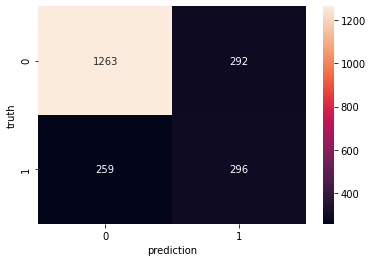

In [75]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_pred)
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('prediction')
plt.ylabel('truth')